In [48]:
import os
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from res import set_default, show_scatterplot, plot_bases

In [18]:
# with specified mean and varance
w_normal = torch.empty(2,2)
w_normal

tensor([[-7.9947e+14,  3.0617e-41],
        [-7.3904e+14,  3.0617e-41]])

In [19]:
w_normal.normal_()
w_normal

tensor([[ 1.2811, -0.3549],
        [ 0.0114, -2.0511]])

In [20]:
w_normal.normal_(mean=5, std=0.01)
w_normal

tensor([[4.9997, 5.0005],
        [5.0014, 5.0046]])

In [21]:
# short
q = torch.empty(2,2).normal_(mean=3, std=0.1)
q

tensor([[2.9539, 2.9457],
        [3.0265, 3.0434]])

In [24]:
e = torch.Tensor(2,2).uniform_(-2,2)
e

tensor([[ 1.3273, -1.7877],
        [ 0.6999, -1.5821]])

In [25]:
# or with nn.init
s = torch.empty(2,2)
nn.init.normal_(s)
s

tensor([[ 0.3150, -0.2556],
        [-0.2438,  0.5084]])

In [26]:
s = torch.empty(2,2)
nn.init.kaiming_normal_(s)
s

tensor([[ 1.9281,  0.9394],
        [-0.8311,  1.0450]])

In [30]:
x_kaim = torch.empty(1, 1000)
nn.init.kaiming_normal_(x_kaim)
x_kaim.shape


torch.Size([1, 1000])

In [42]:
x_xav = torch.empty(1, 1000)
nn.init.xavier_normal_(x_xav)
x_xav.shape

torch.Size([1, 1000])

In [31]:
x_normal = torch.empty(1, 1000)
nn.init.normal_(x_normal)
x_normal.shape

torch.Size([1, 1000])

Text(0.5, 1.0, 'Xavier init')

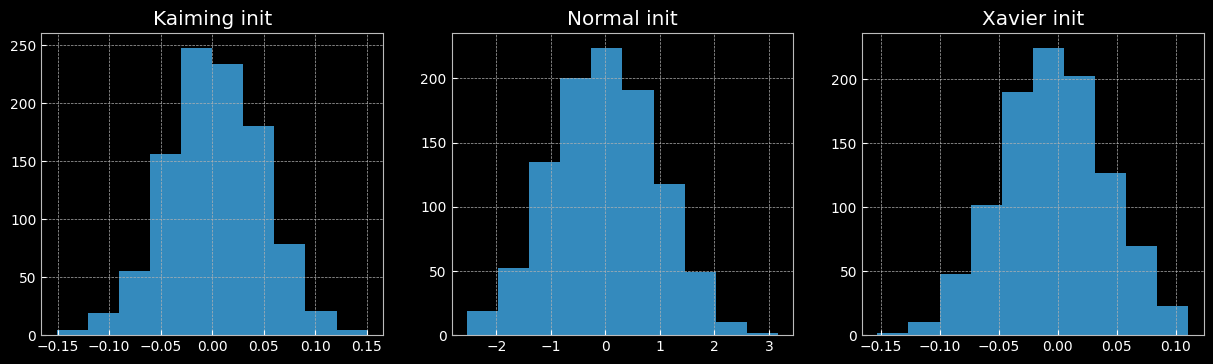

In [46]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].hist(x_kaim)
axs[1].hist(x_normal);
axs[2].hist(x_xav);

axs[0].set_title("Kaiming init")
axs[1].set_title("Normal init")
axs[2].set_title("Xavier init")


# Checking zero init

In [49]:
def seed_all(seed: int = 2):
    os.environ['PYTHONHASHSEDD'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [50]:
seed_all(2)

f1 = nn.Linear(2,2)
act = nn.Sigmoid()
loss_fn = nn.BCELoss()

In [51]:
f1.weight

Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361]], requires_grad=True)

In [55]:
f1.weight = nn.Parameter(torch.zeros_like(f1.weight))
f1.weight

Parameter containing:
tensor([[0., 0.],
        [0., 0.]], requires_grad=True)

In [56]:
x = torch.randn(2,2)
y = torch.eye(2,2)

In [57]:
out1 = f1(x)
out1.retain_grad()
out2 = act(out1)
out2.retain_grad()
loss = loss_fn(out2, y)

In [58]:
loss

tensor(0.7006, grad_fn=<BinaryCrossEntropyBackward0>)

In [59]:
loss.backward()

In [61]:
f1.weight.grad

tensor([[ 0.1556,  0.0471],
        [-0.2328, -0.0657]])